In [5]:
import pandas as pd
fear=pd.read_csv("/content/fear_greed_index.csv")
history=pd.read_csv("/content/historical_data.csv")


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fear=pd.read_csv("/content/fear_greed_index.csv")
print(fear.head())
print(fear.columns)

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [11]:
history=pd.read_csv("/content/historical_data.csv")
print(history.head())
print(history.columns)

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [16]:
history['Timestamp IST'] = pd.to_datetime(history['Timestamp IST'], format='mixed')
fear['date'] = pd.to_datetime(fear['date'])

In [20]:
history['Timestamp IST'] = pd.to_datetime(history['Timestamp IST'])
fear['date'] = pd.to_datetime(fear['date'])
fear['classification'] = fear['classification'].str.capitalize()

In [25]:

history['Timestamp IST'] = pd.to_datetime(history['Timestamp IST'])
history['date'] = history['Timestamp IST'].dt.date

fear.columns = fear.columns.str.strip().str.lower()
fear['date'] = pd.to_datetime(fear['date']).dt.date
fear['classification'] = fear['classification'].str.capitalize()

In [26]:
merged_df = pd.merge(history, fear[['date', 'classification']], on='date', how='left')
merged_df.rename(columns={'classification': 'Market_Sentiment'}, inplace=True)

In [27]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

In [28]:
merged_df.dropna(subset=['Closed PnL', 'Size USD'], inplace=True)

In [29]:
summary = merged_df.groupby('Market_Sentiment').agg({
    'Closed PnL': 'mean',
    'Size USD': 'sum',
    'Side': 'count'
}).rename(columns={'Side': 'trade_count'})

print(summary)

                  Closed PnL      Size USD  trade_count
Market_Sentiment                                       
Extreme fear       47.446302  2.065076e+07         5411
Extreme greed      73.144030  1.123205e+08        34393
Fear               56.544720  3.384638e+08        47315
Greed              35.652184  2.836032e+08        48492
Neutral            31.746470  1.496698e+08        32246


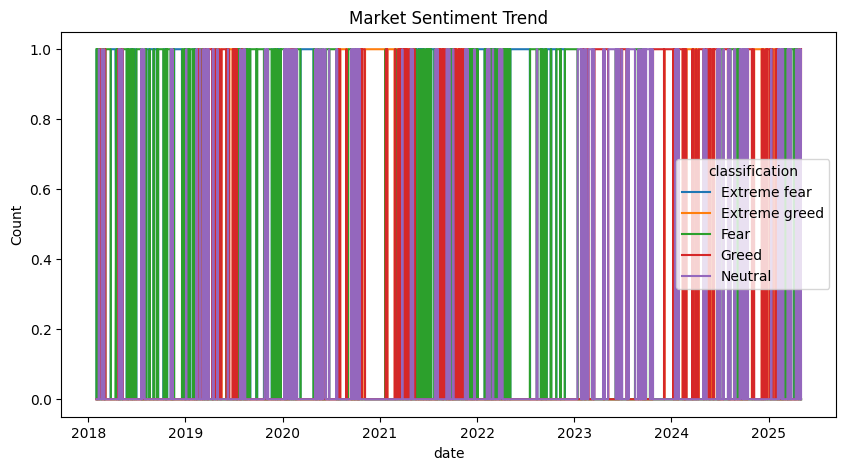

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fear_count = fear.groupby('date')['classification'].value_counts().unstack().fillna(0)
fear_count.plot(kind='line', figsize=(10, 5), title='Market Sentiment Trend')
plt.ylabel("Count")
plt.show()
plt.clf()

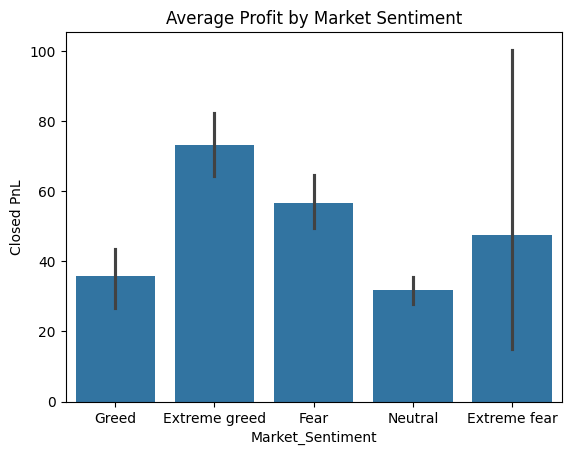

<Figure size 640x480 with 0 Axes>

In [32]:
sns.barplot(data=merged_df, x='Market_Sentiment', y='Closed PnL')
plt.title('Average Profit by Market Sentiment')
plt.show()
plt.clf()

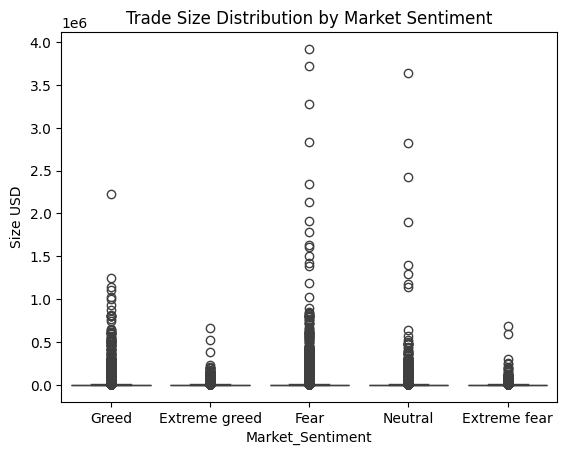

<Figure size 640x480 with 0 Axes>

In [33]:
sns.boxplot(data=merged_df, x='Market_Sentiment', y='Size USD')
plt.title('Trade Size Distribution by Market Sentiment')
plt.show()
plt.clf()